In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
import h5py
import scipy as scipy
from scipy import integrate

import yt
%matplotlib inline

In [3]:
#load datasets
ds = yt.load("/Users/mewcero/Downloads/KelvinHelmholtz/data.0004.hdf5")

yt : [WARNING  ] 2016-11-30 11:08:57,967 Setting code length unit to be 1.0 cm
yt : [WARNING  ] 2016-11-30 11:08:57,968 Setting code mass unit to be 1.0 g
yt : [WARNING  ] 2016-11-30 11:08:57,969 Setting code time unit to be 1.0 s
yt : [INFO     ] 2016-11-30 11:08:57,985 Parameters: current_time              = 3.98090011711
yt : [INFO     ] 2016-11-30 11:08:57,985 Parameters: domain_dimensions         = [32 64  1]
yt : [INFO     ] 2016-11-30 11:08:57,987 Parameters: domain_left_edge          = [ 0. -1.  0.]
yt : [INFO     ] 2016-11-30 11:08:57,988 Parameters: domain_right_edge         = [ 1.  1.  1.]


In [4]:
#create slice plot
slc = yt.SlicePlot(ds, 'z', 'density')

yt : [INFO     ] 2016-11-30 11:08:58,925 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-11-30 11:08:58,926 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-11-30 11:08:58,927 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-11-30 11:08:58,928 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-11-30 11:08:58,930 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



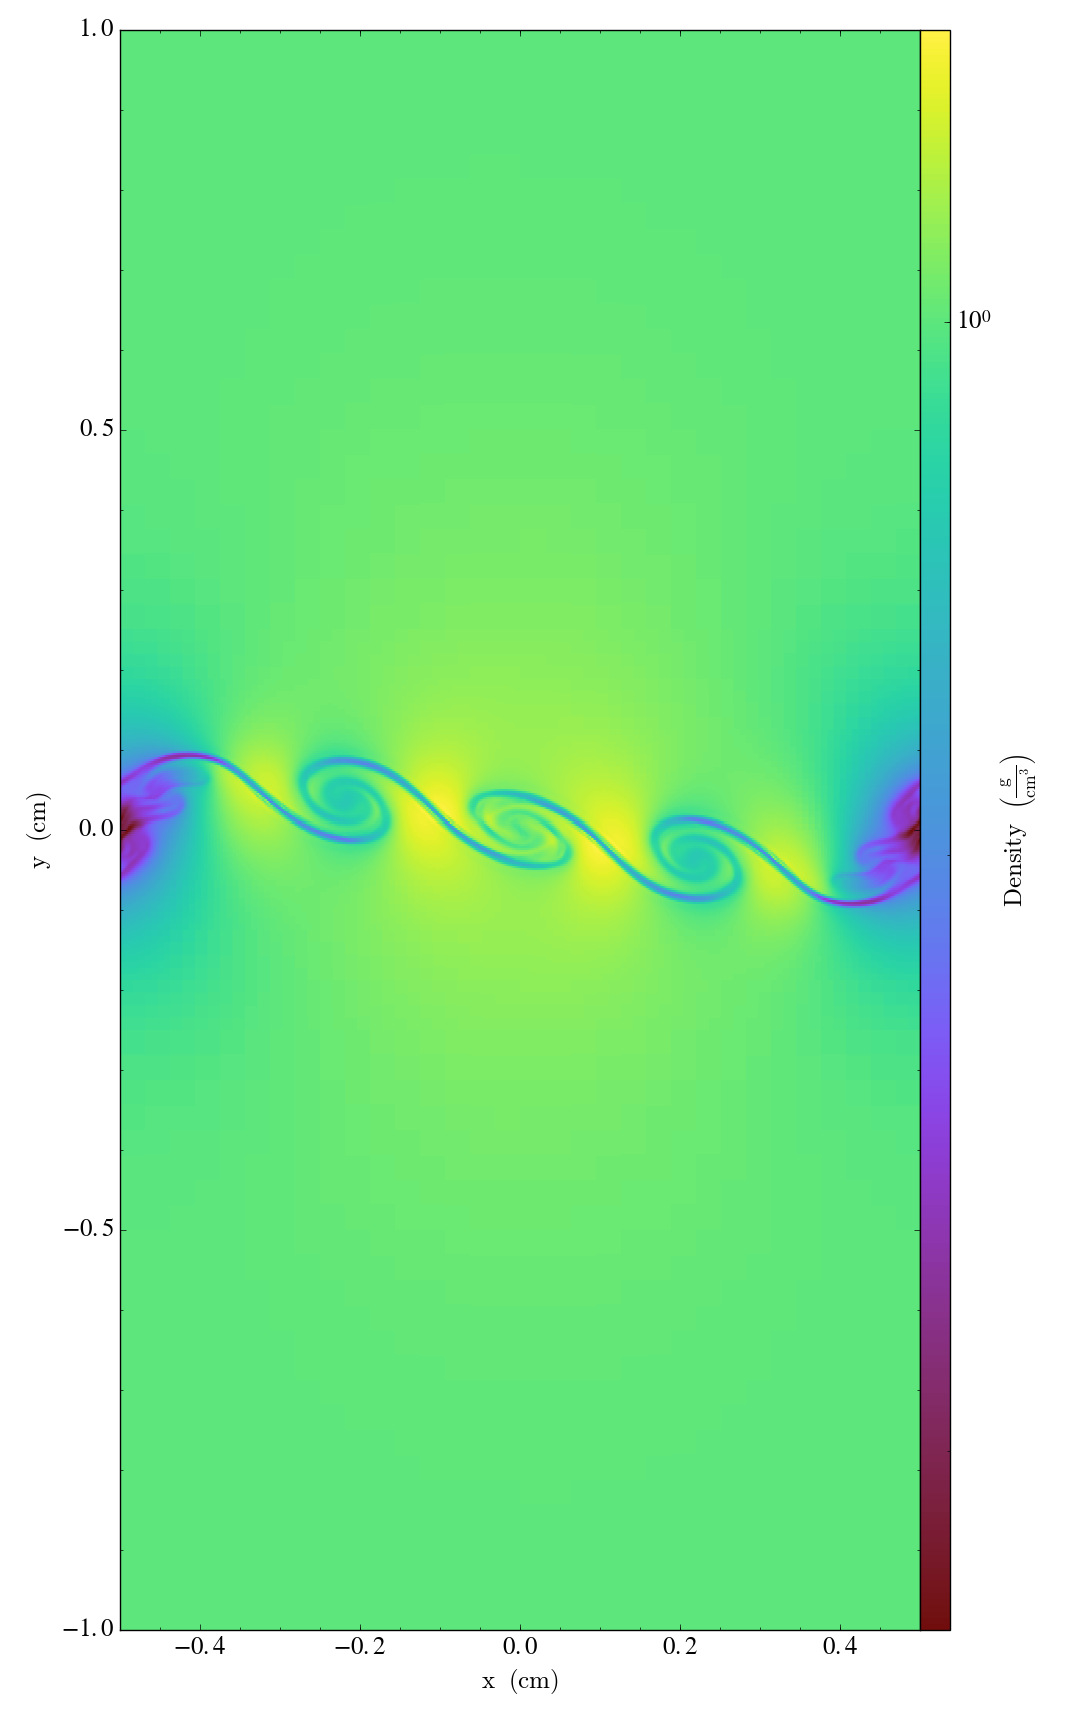

In [5]:
#Nice color palette 
slc

yt : [INFO     ] 2016-11-30 11:09:00,249 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-11-30 11:09:00,250 ylim = -0.500000 0.500000
yt : [INFO     ] 2016-11-30 11:09:00,253 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-11-30 11:09:00,255 ylim = -0.500000 0.500000
yt : [INFO     ] 2016-11-30 11:09:00,258 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



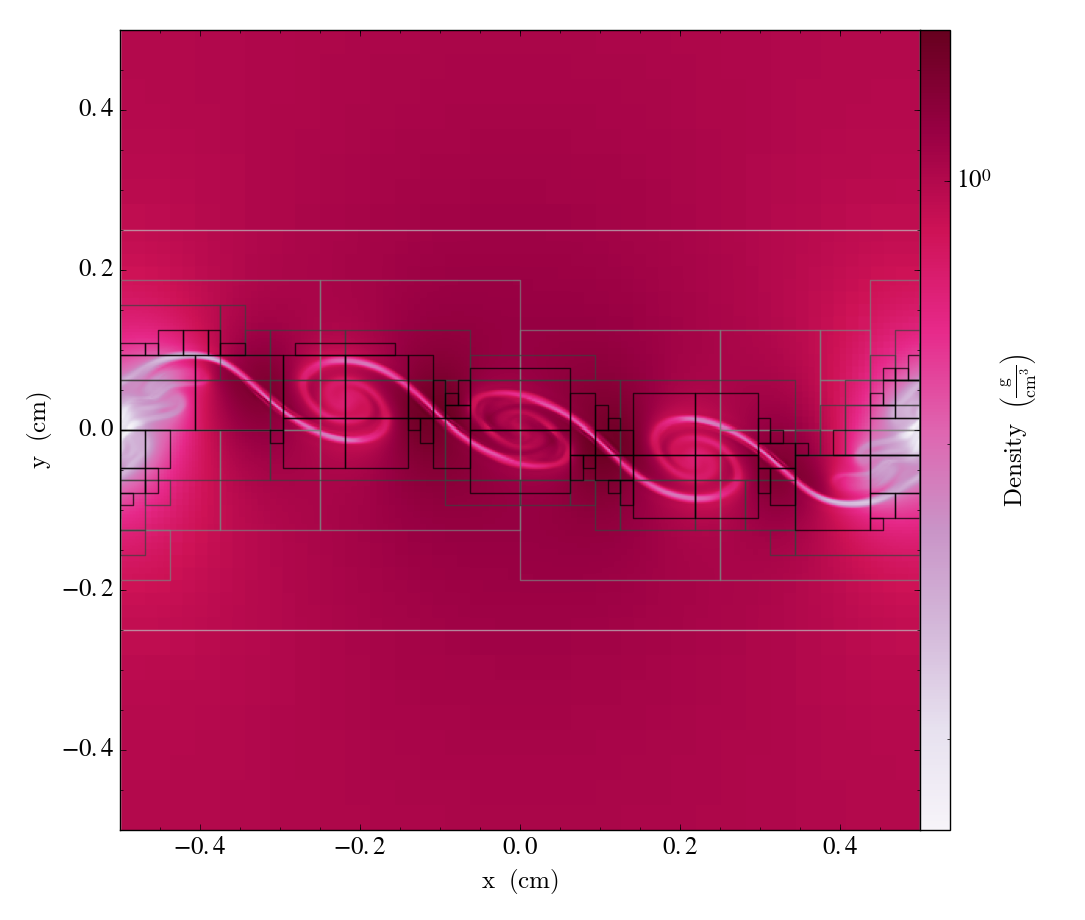

In [6]:
#we can plot the grids and make the palette nicer
slc = yt.SlicePlot(ds, 'z', 'density',width=1.)
slc.set_cmap('density','PuRd')
slc.annotate_grids()
slc

yt : [INFO     ] 2016-11-30 11:09:01,279 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



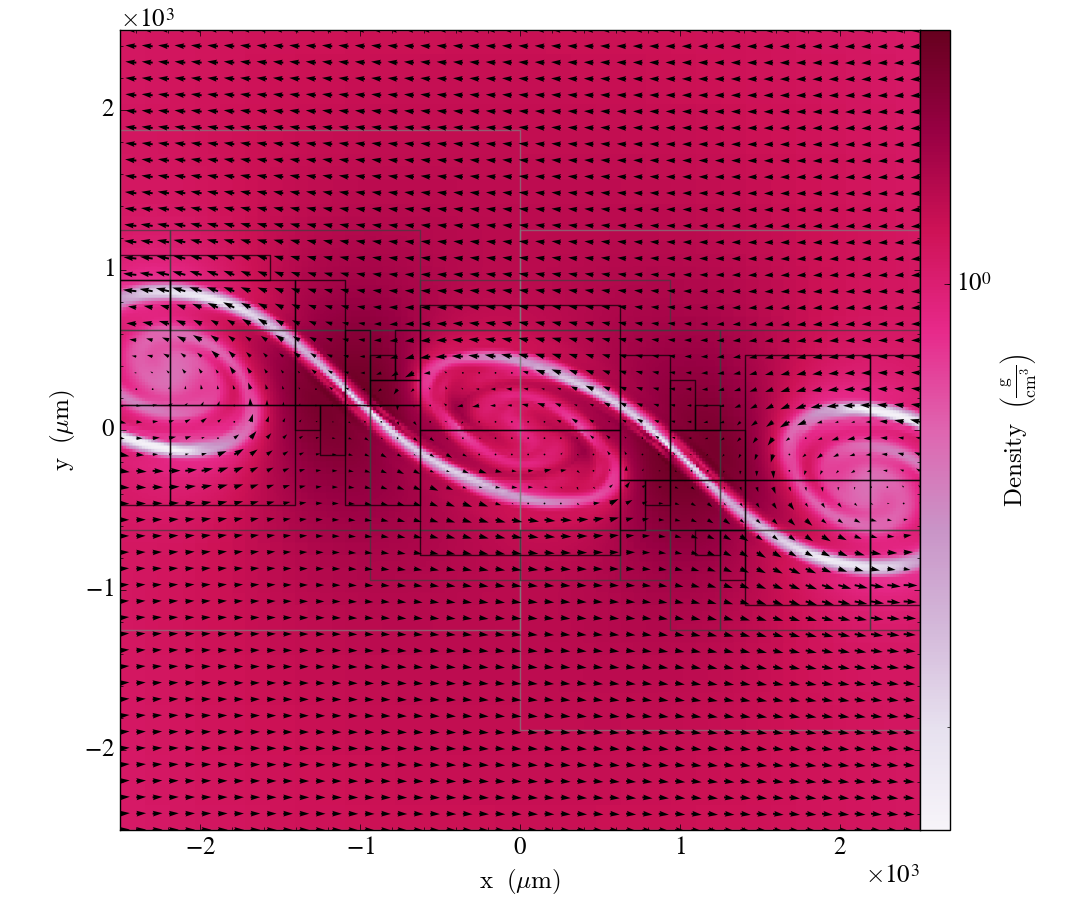

In [7]:
#we can also create the velocity fields and zoom in
slc.annotate_velocity()
slc.zoom(2)

In [8]:
#To know what fields are available to visualize:
print ds.field_list
print ''
print ds.derived_field_list

[('chombo', u'bx1'), ('chombo', u'bx2'), ('chombo', u'bx3'), ('chombo', u'prs'), ('chombo', u'psi_glm'), ('chombo', u'rho'), ('chombo', u'tr1'), ('chombo', u'vx1'), ('chombo', u'vx2'), ('chombo', u'vx3')]

[('chombo', u'bx1'), ('chombo', u'bx2'), ('chombo', u'bx3'), ('chombo', 'cell_volume'), ('chombo', 'dx'), ('chombo', 'dy'), ('chombo', 'dz'), ('chombo', 'path_element_x'), ('chombo', 'path_element_y'), ('chombo', 'path_element_z'), ('chombo', u'prs'), ('chombo', u'psi_glm'), ('chombo', u'rho'), ('chombo', u'tr1'), ('chombo', 'vertex_x'), ('chombo', 'vertex_y'), ('chombo', 'vertex_z'), ('chombo', u'vx1'), ('chombo', u'vx2'), ('chombo', u'vx3'), ('chombo', 'x'), ('chombo', 'y'), ('chombo', 'z'), ('gas', 'H_nuclei_density'), ('gas', 'He_nuclei_density'), ('gas', 'alfven_speed'), ('gas', 'angular_momentum_magnitude'), ('gas', 'angular_momentum_x'), ('gas', 'angular_momentum_y'), ('gas', 'angular_momentum_z'), ('gas', 'averaged_density'), ('gas', 'baroclinic_vorticity_magnitude'), ('gas',

In [46]:
#loading another dataset, now CE :)
ds=yt.load('acc_hdf5_chk_0024')

yt : [INFO     ] 2016-12-01 11:55:08,054 Particle file found: acc_hdf5_chk_0024
yt : [INFO     ] 2016-12-01 11:55:08,063 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-12-01 11:55:08,064 integer runtime parameter forcedplotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-12-01 11:55:08,065 integer runtime parameter nbegin overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-12-01 11:55:08,066 integer runtime parameter particlefilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-12-01 11:55:08,079 Parameters: current_time              = 20.4550798818
yt : [INFO     ] 2016-12-01 11:55:08,080 Parameters: domain_dimensions         = [64 40 40]
yt : [INFO     ] 2016-12-01 11:55:08,081 Parameters: domain_left_edge          = [-5.  -2.5 -2.5]
yt : [INFO     ] 2016-12-01 11:55:08,082 Parameters: domain_right_edge         = [ 3.   2.5  2.5]
yt : [INF

In [47]:
#Let's print the fields so we know what we can plot
print ds.field_list
print ''
print ds.derived_field_list

[('all', u'particle_blk'), ('all', u'particle_posx'), ('all', u'particle_posy'), ('all', u'particle_posz'), ('all', u'particle_proc'), ('all', u'particle_tag'), ('all', u'particle_velx'), ('all', u'particle_vely'), ('all', u'particle_velz'), ('flash', u'bdry'), ('flash', u'dens'), ('flash', u'eint'), ('flash', u'ener'), ('flash', u'gamc'), ('flash', u'game'), ('flash', u'pres'), ('flash', u'temp'), ('flash', u'velx'), ('flash', u'vely'), ('flash', u'velz'), ('io', u'particle_blk'), ('io', u'particle_posx'), ('io', u'particle_posy'), ('io', u'particle_posz'), ('io', u'particle_proc'), ('io', u'particle_tag'), ('io', u'particle_velx'), ('io', u'particle_vely'), ('io', u'particle_velz')]

[('all', 'mesh_id'), ('all', u'particle_blk'), ('all', 'particle_cylindrical_velocity_theta'), ('all', 'particle_cylindrical_velocity_z'), ('all', 'particle_index'), ('all', 'particle_position'), ('all', 'particle_position_cylindrical_radius'), ('all', 'particle_position_cylindrical_theta'), ('all', 'par

yt : [INFO     ] 2016-12-01 11:55:16,515 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-12-01 11:55:16,516 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-12-01 11:55:16,518 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-12-01 11:55:16,518 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-12-01 11:55:16,520 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



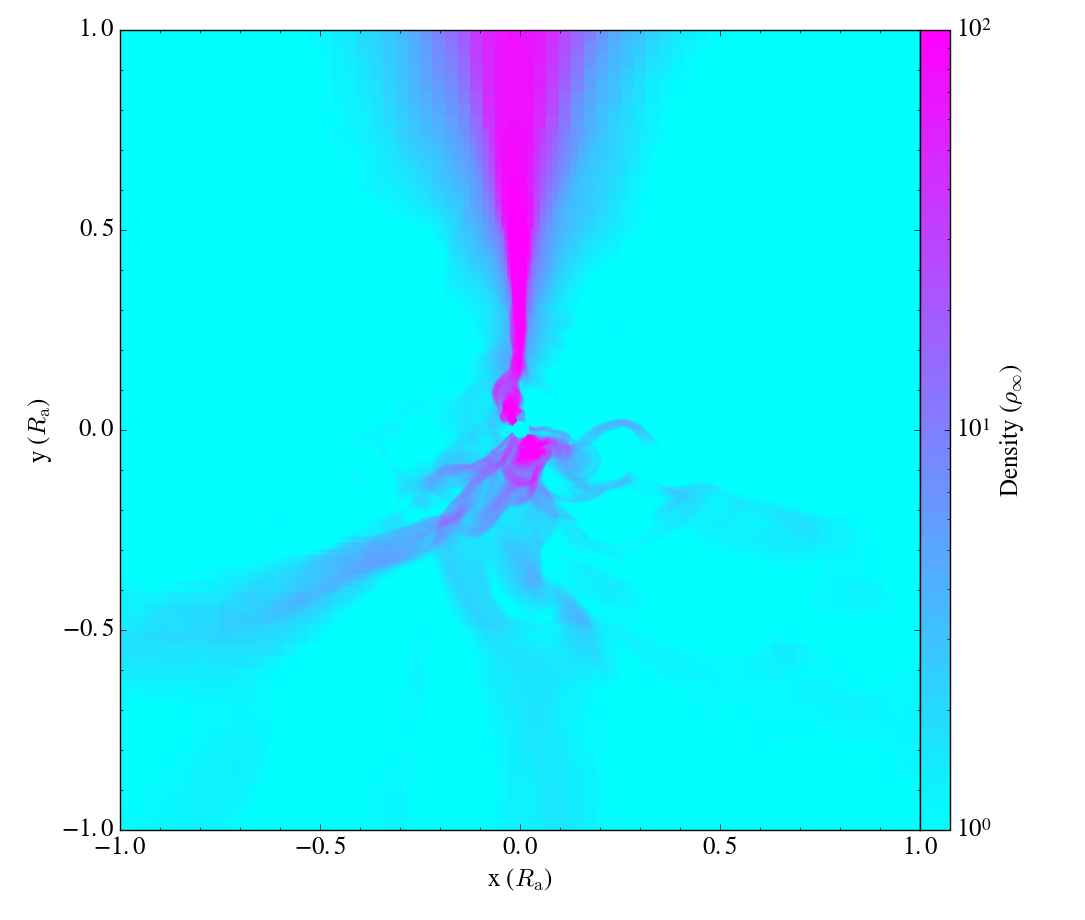

In [48]:
#Let's plot!
slc=yt.SlicePlot(ds2, 'y', 'density', center=[0.,0.,0.], width=2.)
slc.set_ylabel(r'y ($R_{\rm a}$)')
slc.set_xlabel(r'x ($R_{\rm a}$)')
slc.set_cmap('density','cool')
slc.set_zlim('density', 1., 100.)
slc.set_colorbar_label('density',r'Density ($\rho_{\infty}$)')

In [30]:
#creation of disks to do data analysis
disk=ds.disk(center=[0.,0.,0.],normal=[.0, 0.0, 1.0], radius=0.375, height=0.1)

In [32]:
#we can get total quantities within the disk
mass_tot=disk.quantities.total_quantity(['cell_mass'])
print mass_tot

0.713335991193 g


In [35]:
#we can cut regions (i.e., use booleans)
disk_cut=disk.cut_region(["obj['specific_angular_momentum_magnitude']/np.sqrt(0.5*obj['spherical_r']) >= 0.9"])
mass_tot_cut=disk_cut.quantities.total_quantity(['cell_mass'])
print mass_tot_cut

0.506834036154 g


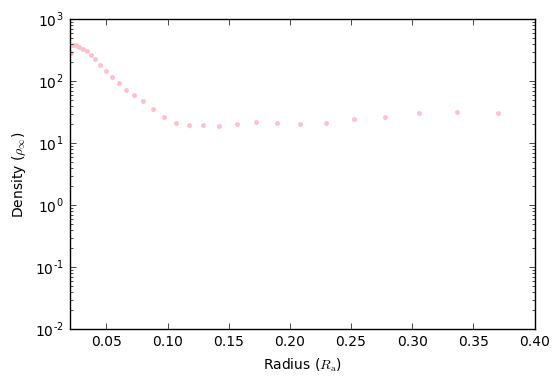

In [44]:
#and create profiles
profile=yt.create_profile(disk, ['spherical_r'], [ 'density'])
plt.plot(profile.x,profile['density'],'.',c='pink')
plt.xlabel(r'Radius ($R_{\rm a}$)')
plt.ylabel(r'Density ($\rho_{\infty}$)')
plt.yscale('log')
plt.xlim(0.02)
plt.show()

In [50]:
print profile.x, profile['density']

[ 0.00088822  0.00097748  0.0010757   0.0011838   0.00130276  0.00143367
  0.00157774  0.00173628  0.00191076  0.00210277  0.00231408  0.00254662
  0.00280252  0.00308415  0.00339407  0.00373514  0.00411048  0.00452353
  0.0049781   0.00547834  0.00602886  0.00663469  0.0073014   0.00803511
  0.00884255  0.00973113  0.010709    0.01178514  0.01296942  0.0142727
  0.01570695  0.01728533  0.01902231  0.02093384  0.02303746  0.02535247
  0.02790012  0.03070377  0.03378916  0.0371846   0.04092124  0.04503337
  0.04955873  0.05453884  0.06001939  0.06605067  0.07268804  0.07999238
  0.08803074  0.09687685  0.10661191  0.11732523  0.12911512  0.14208977
  0.15636822  0.1720815   0.18937379  0.20840377  0.22934605  0.2523928
  0.27775549  0.30566685  0.33638299  0.37018577] cm [  8.95792847e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   8.95792847e-02   0.00000000e+00
   0.00000000e+00   8.95792847e-02   0.00000000e+00   8.95792847e-02
   8.9579284